<h1 style="text-align:center;">Laboratorio 8</h1>
<h4 style="text-align:center;">Cristopher Barrios</h4>
<h4 style="text-align:center;">Mariana David</h4>
<h5 style="text-align:center;">1/9/2023</h5>

### Se utilizará la data y analisis correspondiente del laboratorio 3-DeepLearning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### Ejercicio 1

1. Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis 

In [2]:
# Se cargan los datos
digit = pd.read_csv("./data/train.csv")
# Primeras 5 filas
digit.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Ultimas 5 filas
digit.tail(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#valor maximo de cada columna
digit.max()

label        9
pixel0       0
pixel1       0
pixel2       0
pixel3       0
            ..
pixel779    62
pixel780     0
pixel781     0
pixel782     0
pixel783     0
Length: 785, dtype: int64

In [5]:
#valor minimo de cada columna
digit.min()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
#tipo de dato de cada columna
digit.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [7]:
#Numero de filas y de columnas
digit.shape

(42000, 785)

In [10]:
#informacion del data
digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
#valores faltantes
digit.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [11]:
# Crear la tabla de frecuencias
tabla_frecuencias = digit['label'].value_counts().reset_index()
tabla_frecuencias.columns = ['Valor', 'Frecuencia']
tabla_frecuencias

,Valor,Frecuencia
0,1,4684
1,7,4401
2,3,4351
3,9,4188
4,2,4177
5,6,4137
6,0,4132
7,4,4072
8,8,4063
9,5,3795


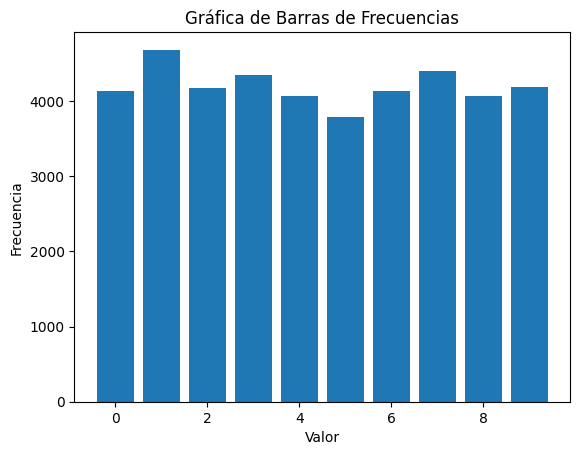

In [12]:
#Grafica de barras
plt.bar(tabla_frecuencias['Valor'], tabla_frecuencias['Frecuencia'])
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Gráfica de Barras de Frecuencias')
plt.show()

Realizando modelo 

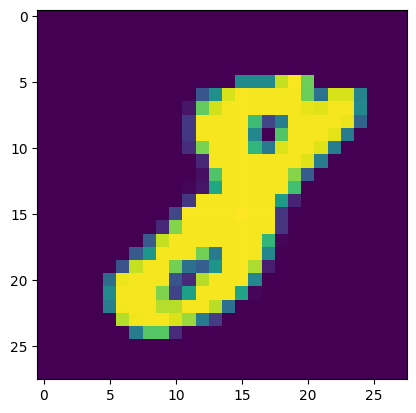

In [13]:
x = digit.to_numpy()[0:,1:].reshape(len(digit),28,28,1) 
y = digit.label.to_numpy()

image = x[245]
plt.imshow(image.squeeze())

Epoch 1/5
1050/1050 [==============================] - 25s 22ms/step - loss: 0.4420 - accuracy: 0.9134 - val_loss: 0.1331 - val_accuracy: 0.9607
Epoch 2/5
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0846 - accuracy: 0.9744 - val_loss: 0.0815 - val_accuracy: 0.9762
Epoch 3/5
1050/1050 [==============================] - 24s 22ms/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0600 - val_accuracy: 0.9827
Epoch 4/5
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0695 - val_accuracy: 0.9801
Epoch 5/5
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0417 - accuracy: 0.9874 - val_loss: 0.0580 - val_accuracy: 0.9833
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                         

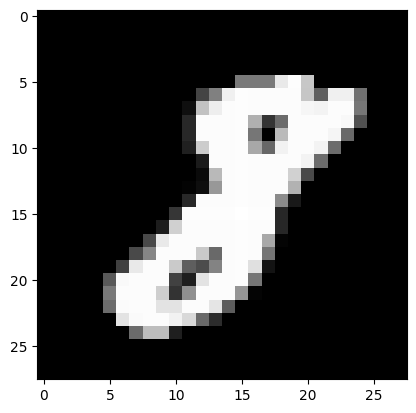

1/1 [==============================] - 0s 198ms/step
Etiqueta predicha: 8


In [14]:
# Definir el modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x, y, epochs=5, validation_split=0.2)

# Mostrar la arquitectura del modelo
model.summary()

# Visualizar una imagen de ejemplo
image = x[245]
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Predecir con el modelo
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)
print("Etiqueta predicha:", predicted_label)


1313/1313 [==============================] - 9s 6ms/step


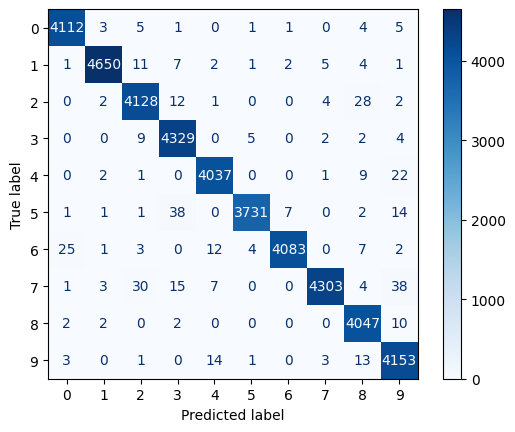

In [15]:
# Predecir con el modelo
prediction = model.predict(x)
predicted_labels = np.argmax(prediction, axis=1)

# Calcular la matriz de confusión
confusion = confusion_matrix(y, predicted_labels)

# Mostrar la matriz de confusión
classes = np.arange(10)  # Dígitos del 0 al 9
disp = ConfusionMatrixDisplay(confusion, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Modelo que determine la efectividad

0.9747619047619047

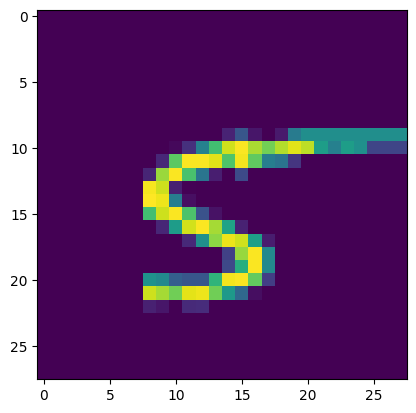

In [16]:
#Modelo realizado: Random Forest
#Importaciones
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import ensemble, model_selection


x = digit.to_numpy()[0:,1:].reshape(len(digit),28,28,1) 
y = digit.label.to_numpy()
image = x[244]
plt.imshow(image.squeeze())

train = pd.read_csv("./data/train.csv").values
X = train[:, 1:]
Y = train[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
forest = ensemble.RandomForestClassifier(
        n_estimators = 1000,
        max_depth = 10,
        min_samples_split = 4,
        n_jobs = -1,
        random_state = 1 )
forest = forest.fit(x_train, y_train)
forest.score(x_train, y_train)



In [ ]:
#Importacion
from sklearn import model_selection

scores = model_selection.cross_val_score(forest, x_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1)
scores

In [ ]:
scores.mean()
forest_ = forest.predict(x_test)
metrics.classification_report(y_test,forest_)


fig, ax = plt.subplots(figsize=(12, 12))
cm = metrics.confusion_matrix(y_test,forest_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1,2,3,4,5,6,7,8,9])
disp = disp.plot(ax=ax)
ax.set_title("Matriz de confusión")
plt.show()
%matplotlib inline

### 2. Elabore una visualización estática

Puede oprtar por en forma de infografía para dar información a una audiencia no especializada en análisis estadístico. En ella debe presentar de una forma comprensible los resultados  más  relevantes,  importantes  y/o  interesantes  que  encontró  en  la  exploración  que hizo de los datos. Tenga en cuenta aspectos como combinación de colores, tipos de gráficos e información que está presentando, para construir su visualización.

### 3. Elaboración de documento 

En el, debe explicar el conjunto de datos que escogió,la razón de la selección  de  los  gráficos  incluidos.  Agregue  la  paleta  de  colores  usada  y  explique  por  qué  la seleccionó. Adicione también el orden que utilizó en su infografía.